In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import Image
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [30]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
image_paths = []
age_labels = []
gender_labels = []
img_folder = '/content/Images/UTKFace'
for filename in os.listdir(img_folder):
    image_path = os.path.join(img_folder, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [32]:
print(f"Number of images: {len(image_paths)}")

Number of images: 23708


In [33]:
df = pd.DataFrame({
    'image': image_paths,
    'age': age_labels,
    'gender': gender_labels})
df.head()

,image,age,gender
0,/content/Images/UTKFace/25_1_2_201701161654254...,25,1
1,/content/Images/UTKFace/80_0_1_201701112056217...,80,0
2,/content/Images/UTKFace/63_0_0_201701202256593...,63,0
3,/content/Images/UTKFace/21_1_2_201612192117176...,21,1
4,/content/Images/UTKFace/53_1_0_201701101412574...,53,1


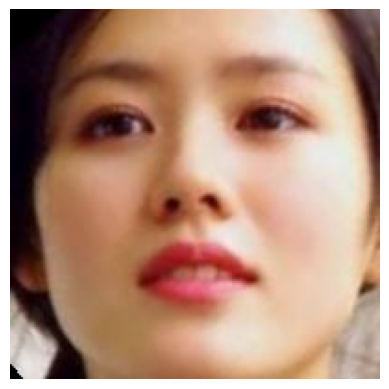

In [34]:
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img)

<Axes: xlabel='age', ylabel='Density'>

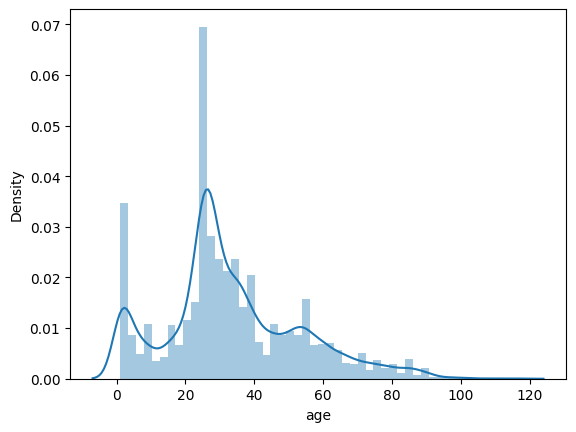

In [35]:
sns.distplot(df['age'])

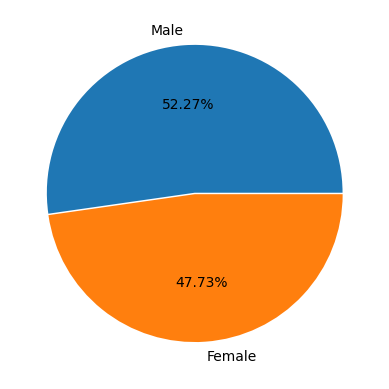

In [36]:
gender_map = {0: 'Male', 1: 'Female'}
temp = dict(df['gender'].value_counts())
temp['Male'] = temp.pop(0)
temp['Female'] = temp.pop(1)
plt.pie(temp.values(), labels=temp.keys(), explode= [0.01, 0], autopct='%.2f%%');

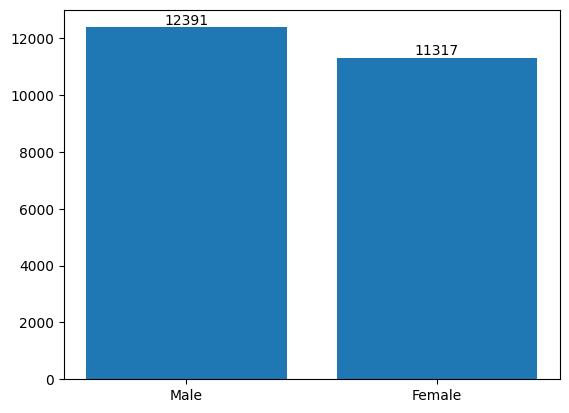

In [37]:
ax = plt.bar(temp.keys(), temp.values())
plt.bar_label(ax);

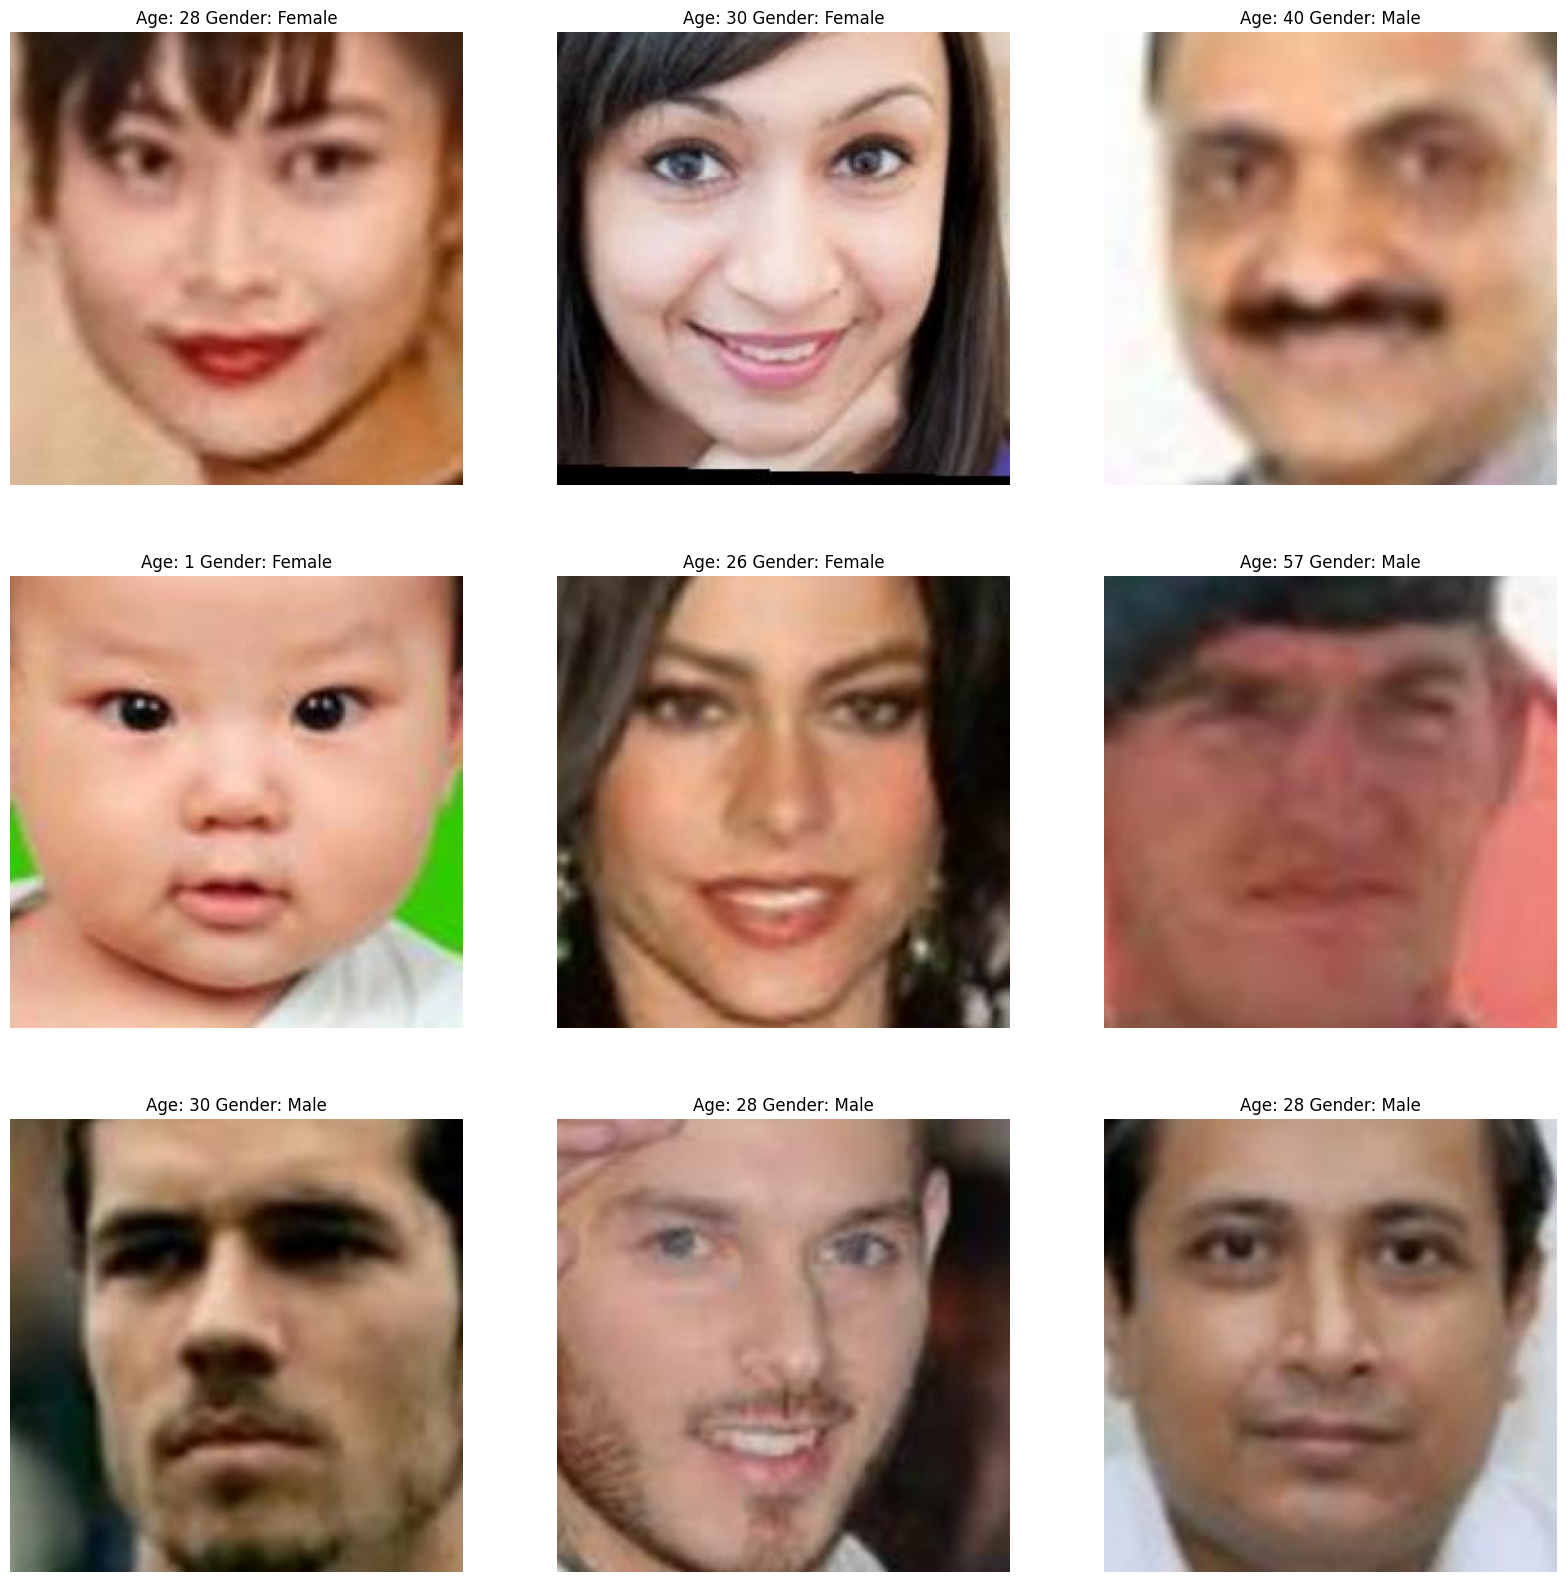

In [38]:
plt.figure(figsize=(20, 20))
files = df.sample(9, random_state=120)
i = 1
for index, file, age, gender in files.itertuples():
    plt.subplot(3, 3, i)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_map[gender]}")
    plt.axis('off')
    i = i + 1

In [39]:
x = []
for image in df['image']:
    img = load_img(image, grayscale=True)
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img)
    x.append(img)
x = np.array(x)
x = x.reshape(len(x), 128, 128, 1)

In [40]:
x = x/255.0

In [41]:
gender_label = np.array(df['gender'])
age_label = np.array(df['age'])

In [42]:
input_shape = (128, 128, 1)
inputs = Input((input_shape))
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
max_pool1 = MaxPooling2D(pool_size=(2, 2)) (layer1)
layer2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (max_pool1)
max_pool2 = MaxPooling2D(pool_size=(2, 2)) (layer2)
layer3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (max_pool2)
max_pool3 = MaxPooling2D(pool_size=(2, 2)) (layer3)
layer4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (max_pool3)
max_pool4 = MaxPooling2D(pool_size=(2, 2)) (layer4)
flatten = Flatten() (max_pool4)

In [43]:
dense1 = Dense(256, activation='relu') (flatten)
dense2 = Dense(256, activation='relu') (flatten)
dropout1 = Dropout(0.3) (dense1)
dropout2 = Dropout(0.3) (dense2)

In [44]:
gender_output = Dense(1, activation='sigmoid', name='gender_out') (dropout1)
age_output = Dense(1, activation='relu', name='age_out') (dropout2)
model = Model(inputs=[inputs], outputs=[gender_output, age_output])
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [46]:
trained_model = model.fit(x=x, y=[gender_label, age_label], batch_size=30, epochs=10, validation_split=0.2)

Epoch 1/10
633/633 [==============================] - 746s 1s/step - loss: 11.6964 - gender_out_loss: 0.4918 - age_out_loss: 11.2046 - gender_out_accuracy: 0.7628 - age_out_accuracy: 0.0326 - val_loss: 9.8742 - val_gender_out_loss: 0.4320 - val_age_out_loss: 9.4422 - val_gender_out_accuracy: 0.8009 - val_age_out_accuracy: 0.0255
Epoch 2/10
633/633 [==============================] - 708s 1s/step - loss: 9.8512 - gender_out_loss: 0.4034 - age_out_loss: 9.4479 - gender_out_accuracy: 0.8173 - age_out_accuracy: 0.0208 - val_loss: 9.5840 - val_gender_out_loss: 0.3563 - val_age_out_loss: 9.2277 - val_gender_out_accuracy: 0.8245 - val_age_out_accuracy: 0.0080
Epoch 3/10
633/633 [==============================] - 752s 1s/step - loss: 8.8117 - gender_out_loss: 0.3554 - age_out_loss: 8.4563 - gender_out_accuracy: 0.8397 - age_out_accuracy: 0.0168 - val_loss: 8.0440 - val_gender_out_loss: 0.3460 - val_age_out_loss: 7.6979 - val_gender_out_accuracy: 0.8378 - val_age_out_accuracy: 0.0074
Epoch 4/10


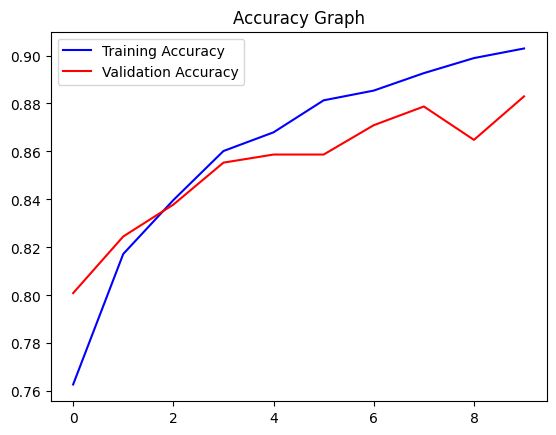

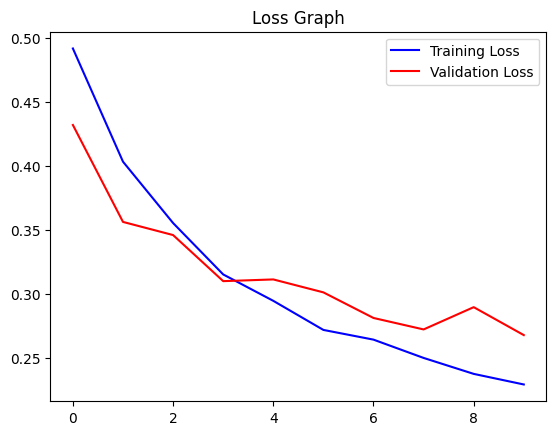

In [47]:
acc = trained_model.history['gender_out_accuracy']
val_acc = trained_model.history['val_gender_out_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
loss = trained_model.history['gender_out_loss']
val_loss = trained_model.history['val_gender_out_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

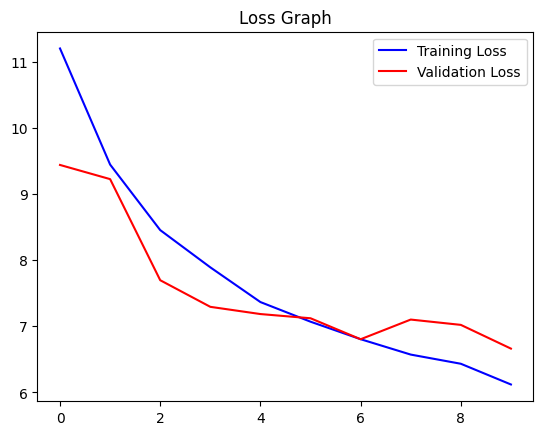

In [48]:
loss = trained_model.history['age_out_loss']
val_loss = trained_model.history['val_age_out_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

1/1 [==============================] - 0s 129ms/step
Original Gender: Male Original Age: 50
Predicted Gender: Male Predicted Age: 43
1/1 [==============================] - 0s 95ms/step
Original Gender: Female Original Age: 25
Predicted Gender: Female Predicted Age: 32
1/1 [==============================] - 0s 66ms/step
Original Gender: Male Original Age: 59
Predicted Gender: Male Predicted Age: 65
1/1 [==============================] - 0s 137ms/step
Original Gender: Female Original Age: 50
Predicted Gender: Female Predicted Age: 41
1/1 [==============================] - 0s 94ms/step
Original Gender: Male Original Age: 31
Predicted Gender: Male Predicted Age: 35
1/1 [==============================] - 0s 146ms/step
Original Gender: Male Original Age: 54
Predicted Gender: Male Predicted Age: 52
1/1 [==============================] - 0s 46ms/step
Original Gender: Male Original Age: 24
Predicted Gender: Male Predicted Age: 21
1/1 [==============================] - 0s 45ms/step
Original Gend

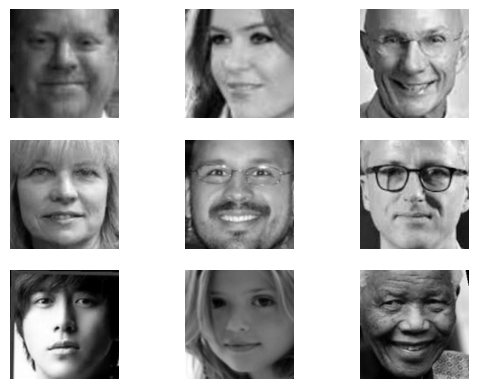

In [50]:
random_test_samples = np.random.randint(0, 23708, 9)
for i, index in enumerate(random_test_samples):
    pred = model.predict(x[index].reshape(1, 128, 128, 1))
    pred_gender = gender_map[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])
    print(f"Original Gender: {gender_map[gender_label[index]]}, Original Age: {age_label[index]}")
    print(f"Original Gender: {pred_gender}, Original Age: {pred_age}")
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(x[index].reshape(128, 128), cmap='gray');